In [37]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import joblib
import os

In [38]:
import os
file_path = os.path.join("data", "Assessment-2-Associate-DS(in).csv")
df = pd.read_csv(file_path, parse_dates=['weekend_date'])


In [39]:
df.head()

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
0,4/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,56
1,11/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,122
2,18/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,102
3,25/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2/7/2022,Channel1,B1,Cat2,Sub-Cat2,1,97


In [40]:
df.loc[10, 'weekend_date']

'13/08/2022'

In [41]:
df.loc[124, 'weekend_date']

'24/09/2022 00:00'

In [42]:
df['weekend_date'].dtype

dtype('O')

In [43]:
print(f"There are {df['weekend_date'].isna().sum()} number of invalid dates in the weekend_date column.")

There are 0 number of invalid dates in the weekend_date column.


In [44]:
df[df['weekend_date'].isnull()]

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity


In [45]:
df.columns = ['weekend_date', 'channel', 'brand', 'category', 'sub_category',
       'serial_num', 'quantity']

In [46]:
df['weekend_date'] = pd.to_datetime(df['weekend_date'].str.split().str[0], dayfirst=True, errors='coerce')

In [47]:
df['weekend_date'].dtype

dtype('<M8[ns]')

In [48]:
df.loc[124, 'weekend_date']

Timestamp('2022-09-24 00:00:00')

In [49]:
df.loc[10, 'weekend_date']

Timestamp('2022-08-13 00:00:00')

In [50]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [51]:
df.head()

,weekend_date,channel,brand,category,sub_category,serial_num,quantity
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97


In [52]:
df_s1 = df[df['serial_num']== 1]

In [53]:
df_s1.head()

,weekend_date,channel,brand,category,sub_category,serial_num,quantity
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97


In [54]:
df_s1 = df_s1.rename(columns={'weekend_date': 'ds', 'quantity': 'y'})

In [55]:
df_s1.head()

,ds,channel,brand,category,sub_category,serial_num,y
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97


In [56]:
df_s1.drop(columns=['channel', 'brand', 'category', 'sub_category', 'serial_num'], inplace=True)

In [57]:
df_s1.head()

,ds,y
0,2022-06-04,56
1,2022-06-11,122
2,2022-06-18,102
3,2022-06-25,128
4,2022-07-02,97


In [58]:
model = Prophet()

In [59]:
df_s1.columns

Index(['ds', 'y'], dtype='object')

In [60]:
model.fit(df_s1)

20:11:41 - cmdstanpy - INFO - Chain [1] start processing
20:11:42 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [62]:
df_s1.tail()

,ds,y
113,2024-08-03,64
114,2024-08-10,63
115,2024-08-17,38
116,2024-08-24,54
117,2024-08-31,78


## Function to create new Dates 

In [63]:
future_dates = model.make_future_dataframe(periods=13+13, freq='W')

In [64]:
future_dates.tail()

,ds
139,2025-01-26
140,2025-02-02
141,2025-02-09
142,2025-02-16
143,2025-02-23


In [65]:
prediction = model.predict(future_dates)

In [66]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-04,124.457021,70.032233,141.121174,124.457021,124.457021,-18.219505,-18.219505,-18.219505,-18.219505,-18.219505,-18.219505,0.0,0.0,0.0,106.237516
1,2022-06-11,123.975718,83.583357,157.813606,123.975718,123.975718,-5.027330,-5.027330,-5.027330,-5.027330,-5.027330,-5.027330,0.0,0.0,0.0,118.948388
2,2022-06-18,123.494415,87.752547,161.771883,123.494415,123.494415,1.696737,1.696737,1.696737,1.696737,1.696737,1.696737,0.0,0.0,0.0,125.191152
3,2022-06-25,123.013112,82.607545,157.150704,123.013112,123.013112,-3.410477,-3.410477,-3.410477,-3.410477,-3.410477,-3.410477,0.0,0.0,0.0,119.602636
4,2022-07-02,122.531809,70.425288,145.872506,122.531809,122.531809,-13.036774,-13.036774,-13.036774,-13.036774,-13.036774,-13.036774,0.0,0.0,0.0,109.495035


c:\Users\Omkar Gadade\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Omkar Gadade\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


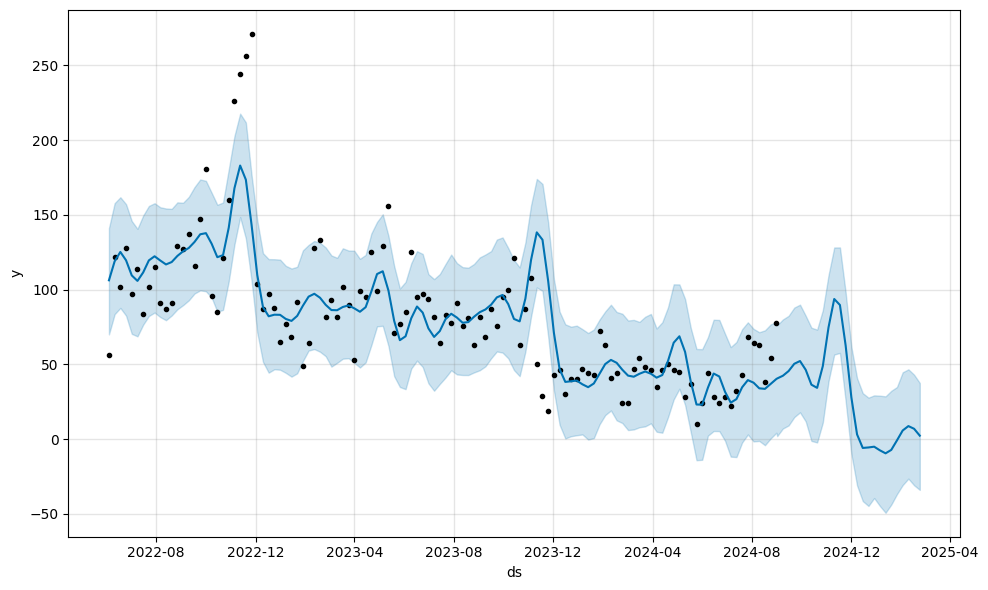

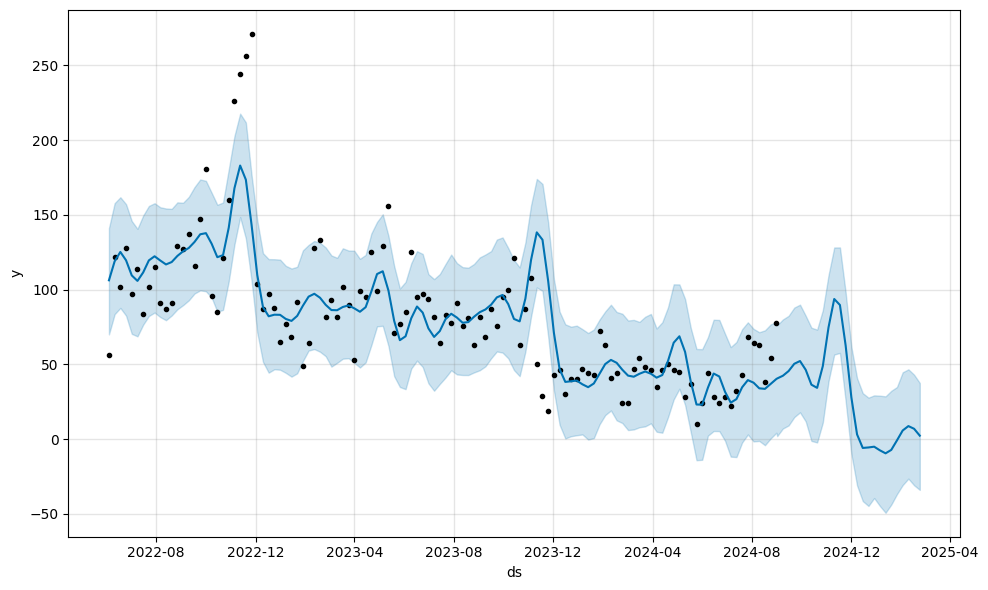

In [67]:
model.plot(prediction)

c:\Users\Omkar Gadade\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Omkar Gadade\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Omkar Gadade\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

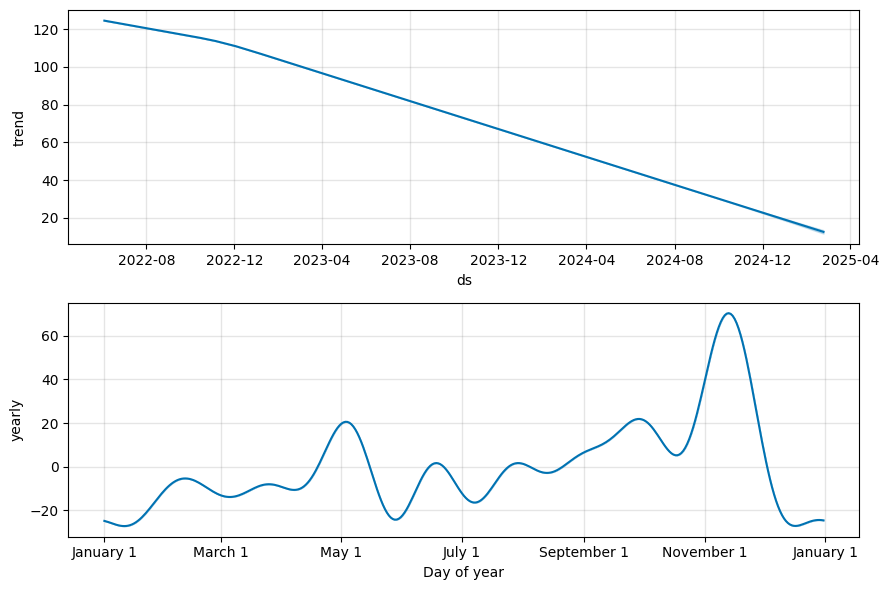

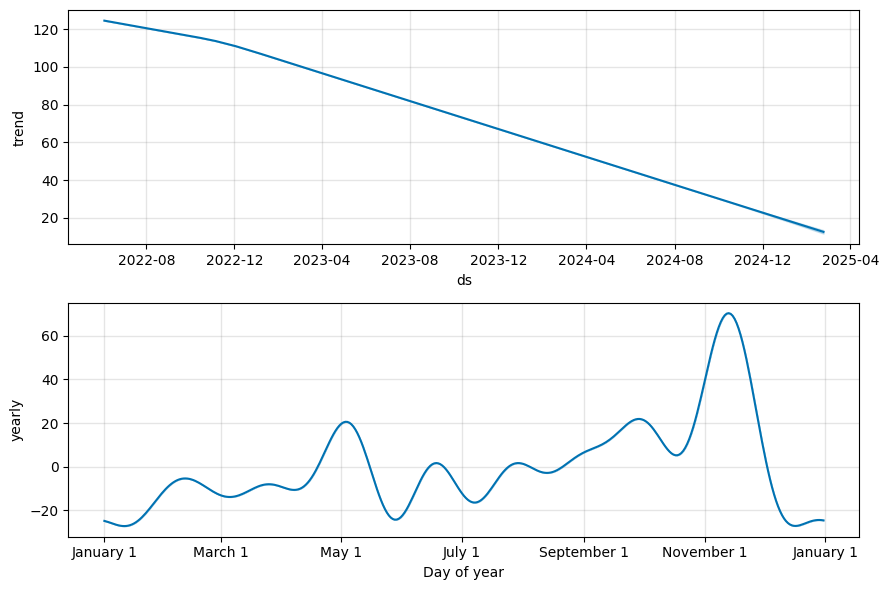

In [68]:
model.plot_components(prediction)